In [1]:
import os
import fnmatch
import pandas as pd
import csv
import numpy as np
from pathlib import Path
from openpyxl import load_workbook
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
#sns.set_theme(style="whitegrid")
import scipy.stats as stats

In [2]:
# Definitions

path = os.getcwd()
#path = os.path.dirname(analysis_path)

In [3]:
# white background 
sns.set(style="ticks", context="talk")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.4})
plt.style.use('default')

In [4]:
df = pd.read_excel(f'{path}/Ketanserin Occupancy.xlsx', sheet_name='Odense Samples', header = 0, engine = 'openpyxl')
df.loc[df['Treatment'] == 'Harmine + DMT', 'Treatment'] = 'Har + DMT'
df.loc[df['Treatment'] == 'Harmine', 'Treatment'] = 'Har'
df.loc[df['Treatment'] == 'VEH', 'Treatment'] = 'Veh'
df.drop(df.tail(2).index,
        inplace = True)
df

,Animal No,Day,Treatment,Repeat No,Tube No,Region,Weight (g),CPM204,CPS,efficacy,Bq,Bq/g,Injected Dose,%ID/g,SBR (FCOR-CERE)/CERE
0,66,1,Har + DMT,1.0,1,CERE,118.9,204,3.400000,0.298417,11.393435,95.823673,300000,0.031941,NaN
1,66,1,Har + DMT,1.0,2,FCOR,95.1,390,6.500000,0.298417,21.781566,229.038554,300000,0.076346,1.390208
2,67,1,Har + DMT,2.0,3,CERE,131.4,204,3.400000,0.298417,11.393435,86.708027,300000,0.028903,NaN
3,67,1,Har + DMT,2.0,4,FCOR,113.4,524,8.733333,0.298417,29.265489,258.073098,300000,0.086024,1.976346
4,68,1,Har,1.0,5,CERE,103.3,150,2.500000,0.298417,8.377526,81.098989,300000,0.027033,NaN
5,68,1,Har,1.0,6,FCOR,91.5,303,5.050000,0.298417,16.922602,184.946466,300000,0.061649,1.280503
6,69,1,Har,2.0,7,CERE,120.4,168,2.800000,0.298417,9.382829,77.930470,300000,0.025977,NaN
7,69,1,Har,2.0,8,FCOR,75.8,281,4.683333,0.298417,15.693898,207.043508,300000,0.069015,1.656772
8,70,1,Veh,1.0,9,CERE,107.7,127,2.116667,0.298417,7.092972,65.858604,300000,0.021953,NaN
9,70,1,Veh,1.0,10,FCOR,90.7,240,4.000000,0.298417,13.404041,147.784354,300000,0.049261,1.243964


In [5]:
df_cerebellum = df[df['Region']=='CERE']
df_cortex = df[df['Region']=='FCOR']

/var/folders/lb/nxxqtlbj7yd1c5frnp5_vxk40000gn/T/ipykernel_36168/3512167089.py:15: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Treatment', y='SBR (FCOR-CERE)/CERE', data=df[df['Region']=='FCOR'], order=['Veh', 'Har', 'DMT', 'Har + DMT'],


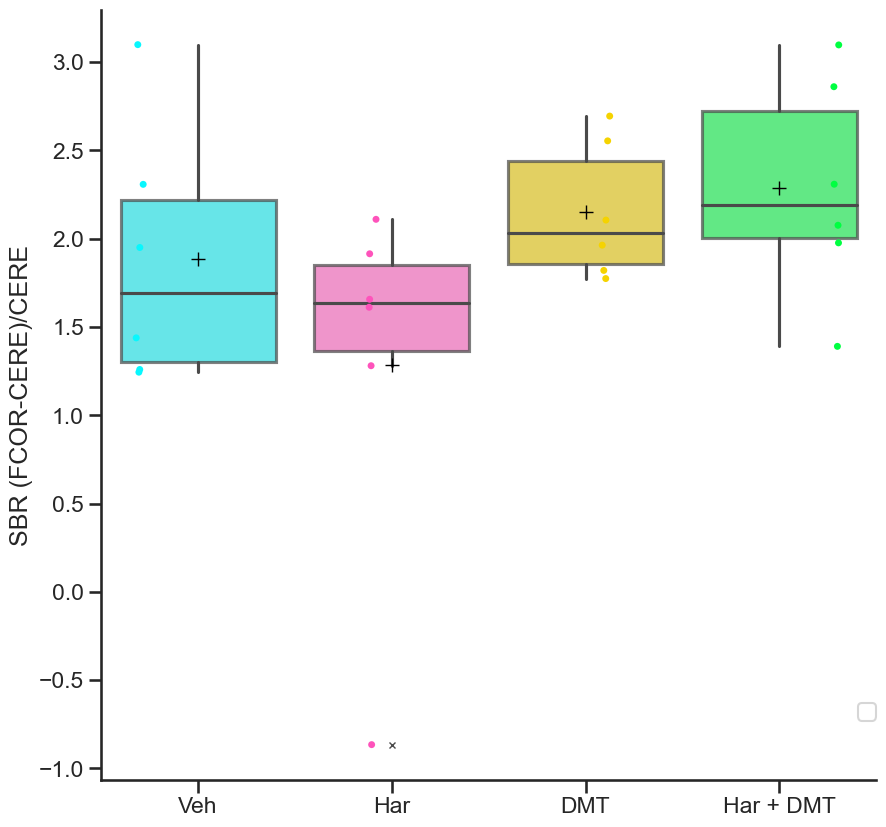

In [6]:
sns.set(style="ticks", context="talk", rc={"figure.figsize":(10, 10)})

colors = [
   '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41',] # matrix green

g = sns.boxplot(x='Treatment', y='SBR (FCOR-CERE)/CERE', data=df[df['Region']=='FCOR'], order=['Veh', 'Har', 'DMT', 'Har + DMT'], 
                 flierprops={"marker": "x"}, showmeans=True, showcaps=False, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}, palette=colors, width=.8, boxprops={'alpha': 0.7}) 

old_len_collections = len(g.collections)
sns.stripplot(x='Treatment', y='SBR (FCOR-CERE)/CERE', data=df[df['Region']=='FCOR'], order=['Veh', 'Har', 'DMT', 'Har + DMT'], 
                 ax=g, palette=colors, dodge=True) 
            
for dots in g.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets())# + np.array([-0.05, 0]))

sns.despine()

# Get the handles and labels. For this example it'll be 2 tuples of length 4 each.
handles, labels = g.get_legend_handles_labels()

# When creating the legend, only use the first two elements to effectively remove the last two.
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.0, 0.1), loc=1, borderaxespad=0.)
for handle in l.legendHandles:
    handle.set_alpha(0.7)

#g.set_title('Harmol')
#g.set_ylabel('normalized SUV', fontsize=16)
g.set_xlabel(None)

#rasterized needed for .eps to account for transparency (that comes with the confidence intervals of the regression line)
fig = g.get_figure()
fig.set_rasterized(True)
fig.savefig(f'{path}/plots/Ketanserin_SBR_plot.eps', dpi=300, format='eps')
fig.savefig(f'{path}/plots/Ketanserin_SBR_plot.png')

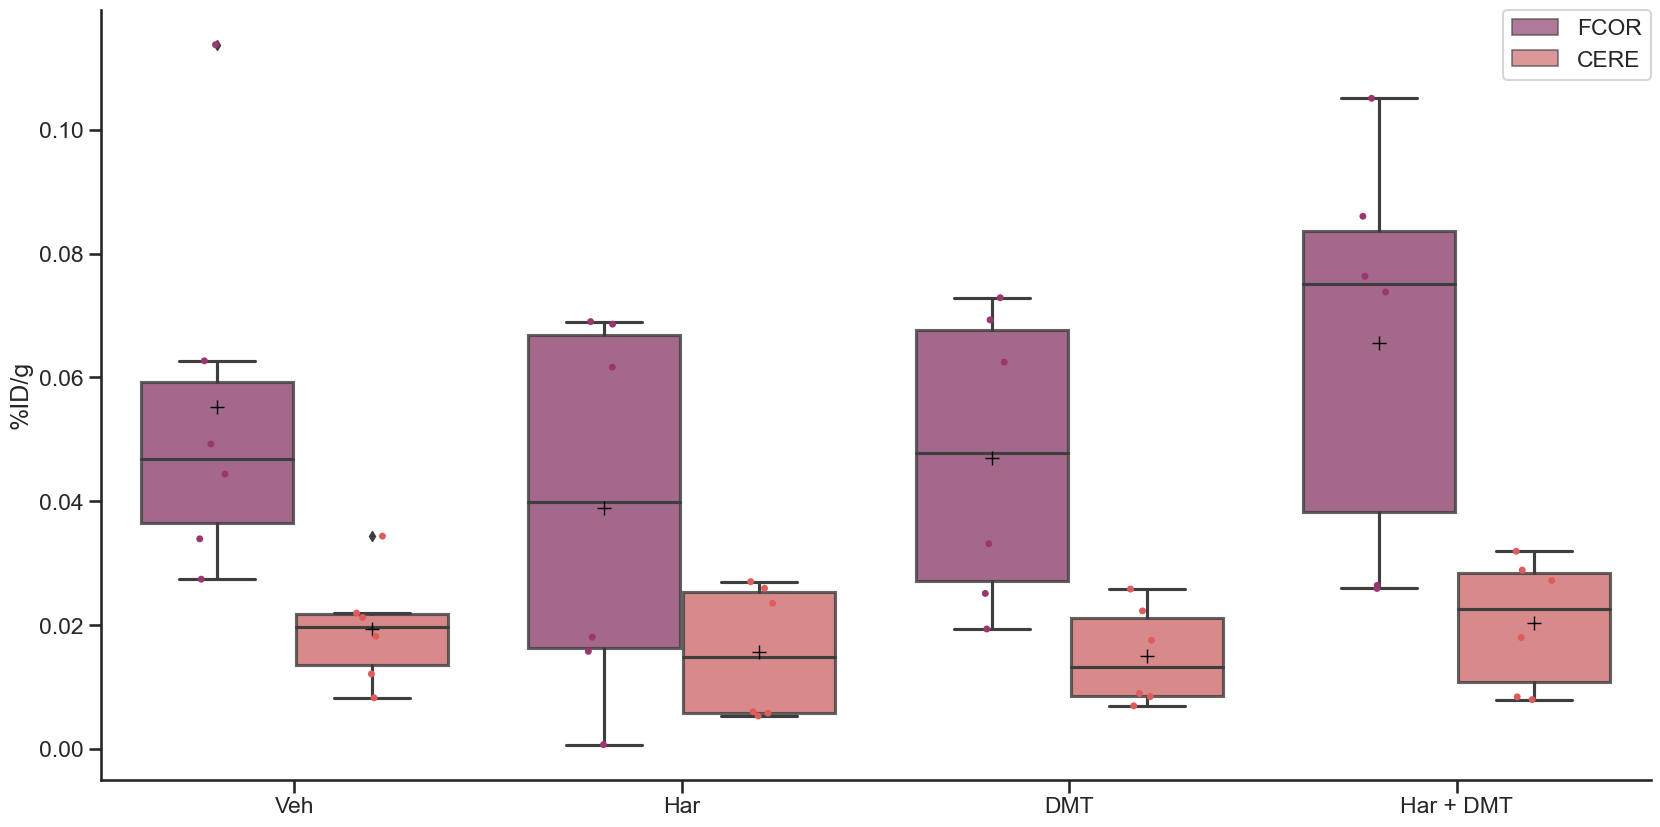

In [7]:
sns.set(style="ticks", context="talk", rc={"figure.figsize":(20, 10)})


g = sns.boxplot(x='Treatment', y='%ID/g', data=df, order=['Veh', 'Har', 'DMT', 'Har + DMT'], 
                hue='Region', hue_order=['FCOR', 'CERE'], showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}, palette='flare_r', width=.8, boxprops={'alpha': 0.8}) 


old_len_collections = len(g.collections)
sns.stripplot(x='Treatment', y='%ID/g', data=df, order=['Veh', 'Har', 'DMT', 'Har + DMT'], 
                hue='Region', hue_order=['FCOR', 'CERE'], ax=g, palette='flare_r', dodge=True) 
            
for dots in g.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets())# + np.array([-0.05, 0]))

sns.despine()

# Get the handles and labels. For this example it'll be 2 tuples of length 4 each.
handles, labels = g.get_legend_handles_labels()

# When creating the legend, only use the first two elements to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.0, 1.0), loc=1, borderaxespad=0.)
for handle in l.legendHandles:
    handle.set_alpha(0.7)

#g.set_title('Harmol')
#g.set_ylabel('normalized SUV', fontsize=16)
g.set_xlabel(None)

#rasterized needed for .eps to account for transparency (that comes with the confidence intervals of the regression line)
fig = g.get_figure()
fig.set_rasterized(True)
fig.savefig(f'{path}/plots/Ketanserin_occupancy_plot.eps', dpi=300, format='eps')
fig.savefig(f'{path}/plots/Ketanserin_occupancy_plot.png')




## ANOVA Ketanserin Specific Binding ratios

assumption check see here: https://www.pythonfordatascience.org/anova-python/

In [8]:
"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

#anova_table(aov_table)

## create linear models and store in dictionary

In [9]:

regions = ['FCOR'] ## only in this row the SBR data is located
region_dict = {} #stores key:value pairs 
for region in regions:
    x= df['SBR (FCOR-CERE)/CERE'][df['Region']==region]
    region_dict[f'{region}_lm'] = ols('x ~ Treatment', data=df[df['Region']==region]).fit()


In [10]:
# homogeneity of variance testing
regions = ['FCOR']

for region in regions:
    print('SBR')
    print(stats.levene(df['SBR (FCOR-CERE)/CERE'][(df['Treatment'] == 'Har + DMT') & (df['Region']==region)],
             df['SBR (FCOR-CERE)/CERE'][(df['Treatment'] == 'Har') & (df['Region']==region)],
             df['SBR (FCOR-CERE)/CERE'][(df['Treatment'] == 'DMT') & (df['Region']==region)],
             df['SBR (FCOR-CERE)/CERE'][(df['Treatment'] == 'Veh') & (df['Region']==region)]))

SBR
LeveneResult(statistic=0.3612769413747736, pvalue=0.7816099040762443)


-> homogeneity of variance is okay

In [11]:
# normality test

shapiro_all = []
for region in regions:
    
    row_shapiro = stats.shapiro(region_dict[f'{region}_lm'].resid)
    shapiro = pd.DataFrame([row_shapiro], columns=row_shapiro._fields)
    shapiro.insert(loc=0, column='SBR', value='SBR')
    
    shapiro_all.append(shapiro)
shapiro_all = pd.concat(shapiro_all, axis=0)
    
shapiro_all

,SBR,statistic,pvalue
0,SBR,0.935066,0.126556


### Q-Q-Plots

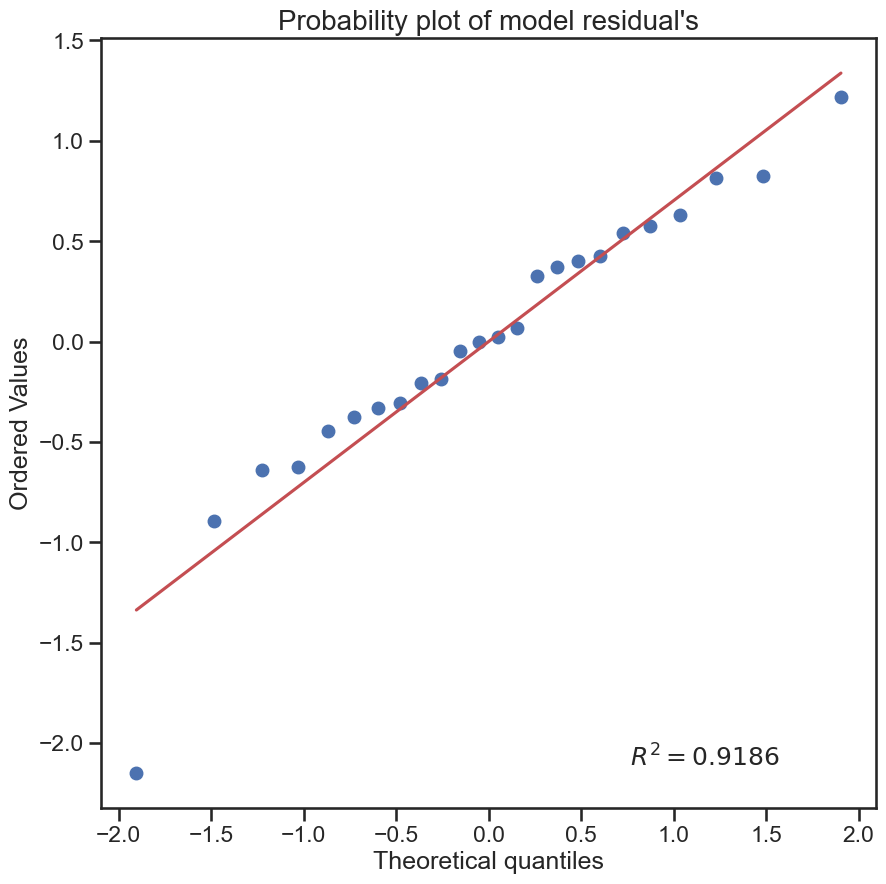

In [12]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(region_dict['FCOR_lm'].resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

-> normality is okay

In [13]:
anova_table_dict = {}
df1 = []
for region in regions:
    anova_table_dict[f'{region}_lm'] = sm.stats.anova_lm(region_dict[f'{region}_lm'], typ=2) # Type 2 ANOVA DataFrame
    
    anova_table(anova_table_dict[f'{region}_lm'])
    anova_table_for_concat = anova_table(anova_table_dict[f'{region}_lm']).reset_index(level=None)
    df1_row = pd.DataFrame(data=['SBR', 'SBR'])
    df1_row.columns = ['SBR']

    df1_row = pd.concat([df1_row, anova_table_for_concat], axis=1)
    #df1_row = pd.concat([df1_row, anova_table_for_concat.set_index(df1_row.index)], axis=1)

    df1.append(df1_row)
df1 = pd.concat(df1, ignore_index=True)

anova_table = df1
df1

,SBR,index,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
0,SBR,Treatment,3.542949,3.0,1.180983,2.093932,0.133147,0.239017,0.120293
1,SBR,Residual,11.280049,20.0,0.564002,NaN,NaN,NaN,NaN


In [20]:
sbr_har_dmt = np.round(df['SBR (FCOR-CERE)/CERE'][df['Treatment']=='Har + DMT'].mean(), decimals = 2)
sbr_har_dmt_sd = np.round(df['SBR (FCOR-CERE)/CERE'][df['Treatment']=='Har + DMT'].std(), decimals = 2)


sbr_har = np.round(df['SBR (FCOR-CERE)/CERE'][df['Treatment']=='Har'].mean(), decimals = 2)
sbr_har_sd = np.round(df['SBR (FCOR-CERE)/CERE'][df['Treatment']=='Har'].std(), decimals = 2)



sbr_dmt = np.round(df['SBR (FCOR-CERE)/CERE'][df['Treatment']=='DMT'].mean(), decimals = 2)
sbr_dmt_sd = np.round(df['SBR (FCOR-CERE)/CERE'][df['Treatment']=='DMT'].std(), decimals = 2)


sbr_veh = np.round(df['SBR (FCOR-CERE)/CERE'][df['Treatment']=='Veh'].mean(), decimals = 2)
sbr_veh_sd = np.round(df['SBR (FCOR-CERE)/CERE'][df['Treatment']=='Veh'].std(), decimals = 2)


sbr_total = np.round(df['SBR (FCOR-CERE)/CERE'].mean(), decimals = 2)
sbr_total_sd = np.round(df['SBR (FCOR-CERE)/CERE'].std(), decimals = 2)


In [15]:
print('Har + DMT ' + str(sbr_har_dmt) + ' ' + str(sbr_har_dmt_sd))
print('Har ' + str(sbr_har) + ' ' + str(sbr_har_sd))
print('DMT ' + str(sbr_dmt) + ' ' + str(sbr_dmt_sd))
print('Veh ' + str(sbr_veh) + ' ' + str(sbr_veh_sd))
print('Total ' + str(sbr_total) + ' ' + str(sbr_total_sd))

Har + DMT 2.28 0.62
Har 1.28 1.09
DMT 2.15 0.39
Veh 1.88 0.73
Total 1.9 0.8


In [19]:
regions = ['FCOR', 'CERE']
for region in regions:

    print(region)
    veh_mean_ID_g = np.round(np.mean(df['%ID/g'][(df['Treatment'] == 'Veh') & (df['Region']==region)]), decimals=4)
    veh_sd_ID_g = np.round(np.std(df['%ID/g'][(df['Treatment'] == 'Veh') & (df['Region']==region)]), decimals=4)
    
    print('Veh ' + str(veh_mean_ID_g) + ' +/- ' + str(veh_sd_ID_g))
    
    har_mean_ID_g = np.round(np.mean(df['%ID/g'][(df['Treatment'] == 'Har') & (df['Region']==region)]), decimals=4)
    har_sd_ID_g = np.round(np.std(df['%ID/g'][(df['Treatment'] == 'Har') & (df['Region']==region)]), decimals=4)
    
    print('Har ' + str(har_mean_ID_g) + ' +/- ' + str(har_sd_ID_g))

    DMT_mean_ID_g = np.round(np.mean(df['%ID/g'][(df['Treatment'] == 'DMT') & (df['Region']==region)]), decimals=4)
    DMT_sd_ID_g = np.round(np.std(df['%ID/g'][(df['Treatment'] == 'DMT') & (df['Region']==region)]), decimals=4)

    print('DMT ' + str(DMT_mean_ID_g) + ' +/- ' + str(DMT_sd_ID_g))

    har_DMT_mean_ID_g = np.round(np.mean(df['%ID/g'][(df['Treatment'] == 'Har + DMT') & (df['Region']==region)]), decimals=4)
    har_DMT_ID_g = np.round(np.std(df['%ID/g'][(df['Treatment'] == 'Har + DMT') & (df['Region']==region)]), decimals=4)

    print('Har + DMT ' + str(har_DMT_mean_ID_g) + ' +/- ' + str(har_DMT_ID_g))
    
    total_mean_ID_g = np.round(np.mean(df['%ID/g'][(df['Region']==region)]), decimals = 4)
    total_sd_ID_g = np.round(np.std(df['%ID/g'][(df['Region']==region)]), decimals = 4)

    print('Total ' + str(total_mean_ID_g) + ' +/- ' + str(total_sd_ID_g))
    

FCOR
Veh 0.0552 +/- 0.0285
Har 0.039 +/- 0.0281
DMT 0.0471 +/- 0.0217
Har + DMT 0.0656 +/- 0.0296
Total 0.0517 +/- 0.0289
CERE
Veh 0.0194 +/- 0.0083
Har 0.0156 +/- 0.0099
DMT 0.015 +/- 0.0073
Har + DMT 0.0204 +/- 0.0096
Total 0.0176 +/- 0.0092
